In [53]:

D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
R.<x> = PolynomialRing(QQ)
Scplx= PowerSeriesRing(CC,'x',default_prec=300)

def division(dividend, divisor) : 
    quotient=(dividend._maxima_().divide(divisor).sage())[0] 
    remainder=(dividend._maxima_().divide(divisor).sage())[1] 
    return (quotient,remainder)

def ordP(n,p):
    fct=factor(n)
    lf=len(fct)
    for k in [0..lf-1]:
        prime=fct[k][0]
        if prime==p:
            answer=fct[k][1]
            return answer
    return 0

def polynomialExponentList(polynomial):
    pel=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        pel=pel+[exponent]
    return pel

def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x

def H(n,m): # definition 8.1 (13aug21)
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    power = 1/(m-2)
    frac=numerator/denominator
    return ((S(frac^power)).O(n+1)).polynomial()

def H4(n,m):
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    return ((S(numerator/denominator)).O(n+1)).polynomial()
#above omit the exponent 1/(m-2) from df 8.1
# to obtain df 8.2

def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})

def deltaDiamond(n,m):
    return D(S(expand((H(n+2,m)^3)/J(n+2,m)))).truncate(n+1)

def deltaDiamondWt12(n,m):
    return D(S(expand((H4(n+2,m)^3)/J(n+2,m)))).truncate(n+1)

def deltaDiamondWt12Strike(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1; not
    # yet defined in draft  21h28jul21
    f=deltaDiamondWt12(n,m)
    fl=f.list()
    df=f.degree()
    sm=sum(fl[k]*(x*m^3*2^6)^k for k in [0..df])
    dsm=sm.degree()
    sml=sm.list()
    notzero=[]
    for entry in sml:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    sm2=sum(fl[k]*(x*m^3*2^6)^k/leadingterm for k in [0..dsm])
    return sm2
        
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

TypeError: __call__() got an unexpected keyword argument 'default_prec'

In [2]:
for m in [3..6]:
    print "-----------------------------------------------------------------------"
    print deltaDiamondWt12(5,m)
 

-----------------------------------------------------------------------
805/1486016741376*x^5 - 23/80621568*x^4 + 7/82944*x^3 - 1/72*x^2 + x
-----------------------------------------------------------------------
2415/2147483648*x^5 - 47/262144*x^4 + 63/16384*x^3 + 5/32*x^2 + x
-----------------------------------------------------------------------
-10939981/655360000000*x^5 + 18203/64000000*x^4 + 11367/640000*x^3 + 47/200*x^2 + x
-----------------------------------------------------------------------
-95/22674816*x^5 + 361/314928*x^4 + 37/1296*x^3 + 5/18*x^2 + x


In [3]:
for m in [3..6]:
    print "-----------------------------------------------------------------------"
    print deltaDiamondWt12Strike(5,m)

-----------------------------------------------------------------------
4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x
-----------------------------------------------------------------------
316538880*x^5 - 12320768*x^4 + 64512*x^3 + 640*x^2 + x
-----------------------------------------------------------------------
-68374881250*x^5 + 145624000*x^4 + 1136700*x^3 + 1880*x^2 + x
-----------------------------------------------------------------------
-153008209920*x^5 + 3028287488*x^4 + 5455872*x^3 + 3840*x^2 + x


In [4]:
poly=D(deltaDiamondWt12Strike(100,3))
data=[]
ls=poly.list()
for n in [1..len(ls)-1]:
    data=data+[polynomialCoefficient(n,poly)-nieburTau(n)]
print data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
import time
import pickle
wfile = open('/Users/barrybrent/16aug21no2.txt','w') # diamond series
data=[]
totalstart=time.time()/60
for m in [3..303]:
    start=time.time()/60
    data=data+[[m,deltaDiamondWt12Strike(100,m)]]
    finish=time.time()/60
    totaltime=finish-totalstart
    print (m,finish-start,totaltime)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

(3, 0.048921145498752594, 0.04892641678452492)
(4, 0.03278841823339462, 0.0817166194319725)
(5, 0.06199771538376808, 0.14371590316295624)
(6, 0.03163916617631912, 0.17536431923508644)
(7, 0.06890740245580673, 0.2442755214869976)
(8, 0.052058786153793335, 0.2963368035852909)
(9, 0.07544393092393875, 0.371782585978508)
(10, 0.047854118049144745, 0.4196383208036423)
(11, 0.07497323676943779, 0.4946131221950054)
(12, 0.0648621991276741, 0.5594803877174854)
(13, 0.07898241654038429, 0.6384646557271481)
(14, 0.05199276655912399, 0.6904591843485832)
(15, 0.08983473479747772, 0.7802962511777878)
(16, 0.06129538267850876, 0.8415998034179211)
(17, 0.08503498136997223, 0.9266393519937992)
(18, 0.05884423479437828, 0.9854857549071312)
(19, 0.08335166797041893, 1.0688396021723747)
(20, 0.07410155236721039, 1.1429482214152813)
(21, 0.09359761700034142, 1.2365483194589615)
(22, 0.056162651628255844, 1.292718168348074)
(23, 0.08490446954965591, 1.377628419548273)
(24, 0.07692041248083115, 1.4545504190

(184, 0.10448656231164932, 20.858267549425364)
(185, 0.12642451375722885, 20.98469601944089)
(186, 0.09991560131311417, 21.08461431786418)
(187, 0.1262580305337906, 21.210874769836664)
(188, 0.10885471850633621, 21.31973173841834)
(189, 0.13326535001397133, 21.453002870082855)
(190, 0.09770940244197845, 21.55071808770299)
(191, 0.12202148512005806, 21.67274633795023)
(192, 0.1046130508184433, 21.77736185118556)
(193, 0.12012278288602829, 21.89748778566718)
(194, 0.08772533014416695, 21.985217336565256)
(195, 0.1385575346648693, 22.12377653643489)
(196, 0.10994414985179901, 22.233723152428865)
(197, 0.1229216493666172, 22.356655035167933)
(198, 0.09905670210719109, 22.45571807026863)
(199, 0.1233297660946846, 22.579049855470657)
(200, 0.10809832066297531, 22.687155287712812)
(201, 0.1307511180639267, 22.81791152060032)
(202, 0.08933666348457336, 22.907250817865133)
(203, 0.12687372043728828, 23.034126788377762)
(204, 0.11458420008420944, 23.148716617375612)
(205, 0.12735367938876152, 23

In [7]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no3.txt','w') 
data=[]
for k in [0..50]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [8]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no4.txt','w') 
data=[]
for k in [51..101]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [9]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no5.txt','w') 
data=[]
for k in [101..150]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [10]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no6.txt','w') 
data=[]
for k in [151..190]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [11]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no7.txt','w') 
data=[]
for k in [191..220]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [12]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no8.txt','w') 
data=[]
for k in [221..250]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [13]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no9.txt','w') 
data=[]
for k in [251..280]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [14]:
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no10.txt','w') 
data=[]
for k in [281..len(s)-1]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [18]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/16aug21no2.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/16aug21no11.txt','w') # diamond polynomials
for qpower in [0..100]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1] 
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    finish = time.time()
    print([qpower,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 0.7611708641052246]
[1, 0.8171708583831787]
[2, 0.7723300457000732]
[3, 0.8146700859069824]
[4, 0.7871840000152588]
[5, 0.8214538097381592]
[6, 0.769646167755127]
[7, 0.8228569030761719]
[8, 0.7773780822753906]
[9, 0.8345639705657959]
[10, 0.7749109268188477]
[11, 0.827772855758667]
[12, 0.775219202041626]
[13, 0.8238561153411865]
[14, 0.8381509780883789]
[15, 0.793881893157959]
[16, 0.8547778129577637]
[17, 0.812716007232666]
[18, 0.8578310012817383]
[19, 0.8095049858093262]
[20, 0.8562970161437988]
[21, 0.8169379234313965]
[22, 0.8474788665771484]
[23, 0.8179588317871094]
[24, 0.8530130386352539]
[25, 0.8057188987731934]
[26, 0.8627939224243164]
[27, 0.8120100498199463]
[28, 0.8800339698791504]
[29, 0.8377108573913574]
[30, 0.8971621990203857]
[31, 0.862311840057373]
[32, 0.9336810111999512]
[33, 0.8379461765289307]
[34, 0.9029331207275391]
[35, 0.865839958190918]
[36, 0.9380919933319092]
[37, 0.8642699718475342]
[38, 0.9155359268188477]
[39, 0.8723039627075195]
[40, 0.9229838848

In [19]:
import pickle
rfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no12.txt','w') 
data=[]
for k in [0..70]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [20]:
import pickle
rfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
wfile = open('/Users/barrybrent/run16aug21no13.txt','w') 
data=[]
for k in [71..100]:
    data=data+[s[k]]
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

In [2]:
# experimental controls
import time
import pickle
wfile = open('/Users/barrybrent/16aug21no14.txt','w') # diamond series
data=[]
totalstart=time.time()/60
for m in [3..63]:
    start=time.time()/60
    data=data+[[m,deltaDiamondWt12(20,m)]]
    finish=time.time()/60
    totaltime=finish-totalstart
    print (m,finish-start,totaltime)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

(3, 0.0047219544649124146, 0.0047330670058727264)
(4, 0.0020632483065128326, 0.006803315132856369)
(5, 0.004554297775030136, 0.011362913995981216)
(6, 0.0032441169023513794, 0.014615483582019806)
(7, 0.005042135715484619, 0.01966128498315811)
(8, 0.0026939474046230316, 0.02235676348209381)
(9, 0.005634468048810959, 0.02799273282289505)
(10, 0.00410810112953186, 0.032102398574352264)
(11, 0.005659371614456177, 0.03776375204324722)
(12, 0.004354000091552734, 0.042123131453990936)
(13, 0.005764618515968323, 0.0478958822786808)
(14, 0.004454616457223892, 0.052351947873830795)
(15, 0.006830830127000809, 0.059184279292821884)
(16, 0.002858217805624008, 0.06204403191804886)
(17, 0.006372567266225815, 0.06841801479458809)
(18, 0.005096796900033951, 0.07351671531796455)
(19, 0.006253134459257126, 0.07977139949798584)
(20, 0.004951663315296173, 0.08473188057541847)
(21, 0.007163632661104202, 0.09190381318330765)
(22, 0.0049338676035404205, 0.09684306383132935)
(23, 0.006476517766714096, 0.103321

In [3]:
# interpolating polynomials: experimental controls
import pickle
rfile = open('/Users/barrybrent/16aug21no14.txt','r') # diamond series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/16aug21no15.txt','w') # diamond polynomials
for qpower in [0..20]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1] 
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    finish = time.time()
    print([qpower,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 0.4838700294494629]
[1, 0.03897500038146973]
[2, 0.041396141052246094]
[3, 0.044445037841796875]
[4, 0.046041011810302734]
[5, 0.04948592185974121]
[6, 0.05085110664367676]
[7, 0.05266594886779785]
[8, 0.05479001998901367]
[9, 0.09616899490356445]
[10, 0.05809807777404785]
[11, 0.06189894676208496]
[12, 0.06379508972167969]
[13, 0.06592011451721191]
[14, 0.0651710033416748]
[15, 0.07204008102416992]
[16, 0.07032990455627441]
[17, 0.07389307022094727]
[18, 0.07523894309997559]
[19, 0.07678699493408203]
[20, 0.0803680419921875]


In [4]:
import pickle
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)

import pickle
rtfile = open('/Users/barrybrent/16aug21no15.txt','r') # diamond series
rt=pickle.load(rtfile)
rtfile.close()
t=stripQuotationMarks(rt)

for k in [1..len(t)-1]:
    ns=s[k][0]
    nt=t[k][0]
    polys=D(s[k][1])
    polyt=D(t[k][1])
    ds=polys.degree()
    dt=polyt.degree()
    print (ns,nt,ds,dt)
    # polyt's are not interpolated.

(1, 1, 0, 0)
(2, 2, 3, 60)
(3, 3, 6, 60)
(4, 4, 9, 60)
(5, 5, 12, 60)
(6, 6, 15, 60)
(7, 7, 18, 60)
(8, 8, 21, 60)
(9, 9, 24, 60)
(10, 10, 27, 60)
(11, 11, 30, 60)
(12, 12, 33, 60)
(13, 13, 36, 60)
(14, 14, 39, 60)
(15, 15, 42, 60)
(16, 16, 45, 60)
(17, 17, 48, 60)
(18, 18, 51, 60)
(19, 19, 54, 60)
(20, 20, 57, 60)


In [7]:
import pickle
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)


nfdata=[]
for k in [1..4]:
    n=s[k][0]
    poly=D(s[k][1])
    nf=numericalfactor(poly)
    nfdata=nfdata+[nf]
    print "-----------------------------------------------------------------------"
    print
    print (n,nf)
    print
    print poly.factor()
print nfdata

-----------------------------------------------------------------------

(1, 1)

1
-----------------------------------------------------------------------

(2, 24)

(24) * x * (x^2 - 28/3)
-----------------------------------------------------------------------

(3, 252)

(252) * x^2 * (x^4 - 1432/63*x^2 + 7792/63)
-----------------------------------------------------------------------

(4, 1472)

(1472) * x^3 * (x^6 - 26348/621*x^4 + 348400/621*x^2 - 1454144/621)
[1, 24, 252, 1472]


In [11]:
import pickle
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)


nfdata=[]
for k in [1..len(s)-1]:
    n=s[k][0]
    poly=D(s[k][1])
    nf=numericalfactor(poly)
    nfdata=nfdata+[nf-nieburTau(n)*(-1)^(n+1)]
print nfdata 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
import pickle
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)


data=[]
for k in [3..len(s)-1]:
    n=s[k][0]
    poly=s[k][1]
    divideby=x^(n-1)
    g=division(poly,divideby)
    explist=polynomialExponentList(D(g[0]))
    # explist = 1 => g[0] is irreducible.
    data=data+[explist]
print data

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


In [15]:
import pickle
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)



data=[]
for k in [3..len(s)-1]:
    n=s[k][0]
    poly=s[k][1]
    divideby=x^n
    g=division(poly,divideby)
    if g[1]==0:data=data+[n]
print data

[]


In [19]:
import pickle
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)



data=[]
for k in [0..len(s)-1]:
    n=s[k][0]
    poly=D(s[k][1])
    dg=poly.degree()
    data=data+[(n,dg-(3*n-3))]
print data

[(0, 2), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0)]


99


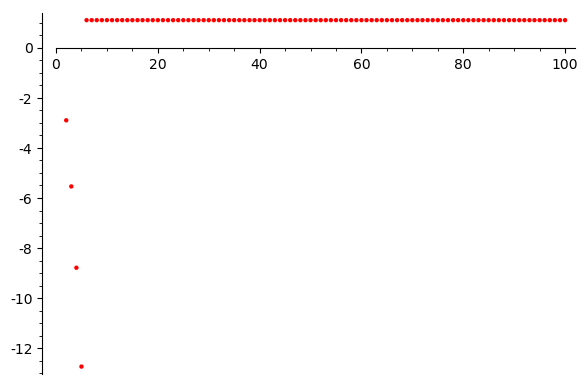

In [57]:
import pickle
import math
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)


lengths=[]
points=[]
for k in [2..len(s)-1]:
    distances=[]
    n=s[k][0]
    poly=s[k][1]
    pr=poly.roots()
    lpr=len(pr)
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        re=root[0]
        im=root[1]
        tfr=math.isnan(re)
        tfi=math.isnan(im)
        if tfr==False:
            if tfi==False:
                zero=re+I*im
                if zero!=3:
                    distance=abs(zero-3)
        distances=distances+[distance]
    minimum=min(distances)
    points=points+[[n,log(minimum)]]
print len(points)
plot=list_plot(points,color='red')
show(plot)

In [58]:
print points

[[2, log(abs(2/3*sqrt(7)*sqrt(3) - 3))], [3, log(abs(2/3*sqrt(abs(-4/7*sqrt(85) + 179/7))*cos(1/2*arctan2(0, -4/7*sqrt(85) + 179/7)) + 2/3*I*sqrt(abs(-4/7*sqrt(85) + 179/7))*sin(1/2*arctan2(0, -4/7*sqrt(85) + 179/7)) - 3))], [4, log(abs(1/1863*sqrt(abs(3470769/2*I*sqrt(3)*(77824/1156923*I*sqrt(85021)*sqrt(3) + 209216208896/6466042647)^(1/3) - 3470769/2*(77824/1156923*I*sqrt(85021)*sqrt(3) + 209216208896/6466042647)^(1/3) - 22573952*I*sqrt(3)/(77824/1156923*I*sqrt(85021)*sqrt(3) + 209216208896/6466042647)^(1/3) - 22573952/(77824/1156923*I*sqrt(85021)*sqrt(3) + 209216208896/6466042647)^(1/3) + 49086324))*cos(1/2*arctan2(3470769/2*sqrt(3)*abs(77824/1156923*I*sqrt(85021)*sqrt(3) + 209216208896/6466042647)^(1/3)*cos(1/3*arctan(106191/51078176*sqrt(85021)*sqrt(3))) - 3470769/2*abs(77824/1156923*I*sqrt(85021)*sqrt(3) + 209216208896/6466042647)^(1/3)*sin(1/3*arctan(106191/51078176*sqrt(85021)*sqrt(3))) - 22573952*sqrt(3)*cos(1/3*arctan(106191/51078176*sqrt(85021)*sqrt(3)))/abs(77824/1156923*I*

In [61]:
import pickle
import math
rsfile = open('/Users/barrybrent/16aug21no11.txt','r') # diamond series
rs=pickle.load(rsfile)
rsfile.close()
s=stripQuotationMarks(rs)


lengths=[]
points=[]
for k in [2..len(s)-1]:
    distances=[]
    n=s[k][0]
    poly=s[k][1]
    pr=poly.roots()
    lpr=len(pr)
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        re=root[0]
        im=root[1]
        tfr=math.isnan(re)
        tfi=math.isnan(im)
        if tfr==False:
            if tfi==False:
                distance=re
        distances=distances+[distance]
    minimum=min(distances)
    points=points+[[n,log(minimum)]]
print len(points)
plot=list_plot(points,color='red')
show(plot)

99


/Applications/SageMath-9.1.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/rich_output/display_manager.py:592: RichReprWarning: Exception in _rich_repr_ while displaying object: Axis limits cannot be NaN or Inf
  RichReprWarning,


ValueError: Axis limits cannot be NaN or Inf